In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
#%matplotlib inline

In [6]:
import networkx as nx

In [7]:
data = pd.read_csv('/home/devops/Documents/Practice-Python/shakespear data - analysis/Shakespeare_data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [9]:
data.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [10]:
player_search_3 = data.copy()

In [11]:
# in place substitution of nan in data (dataframe)
data['Player'].replace(np.nan ,'Other' , inplace = True)

In [12]:
# 1. Analysis to unique plays in dataset

In [13]:
# calculate total number of uniques plays in data
print("Unique number of plays in dataset")

Unique number of plays in dataset


In [14]:
data['Play'].nunique()

36

In [15]:
#constructing a dataframe having unique plays
pd.DataFrame(data['Play'].unique().tolist() , columns = ['Play'])

,Play
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well
5,As you like it
6,Antony and Cleopatra
7,A Comedy of Errors
8,Coriolanus
9,Cymbeline


In [16]:
# total number of unique players in each play inside dataset

In [17]:
player_numbers = data.groupby(data['Play'])['Player'].nunique().sort_values(ascending = False)

In [18]:
player_numbers


Play
Richard III                 71
Henry VI Part 2             65
Coriolanus                  62
Timon of Athens             55
Antony and Cleopatra        55
Henry VI Part 1             53
Julius Caesar               51
Pericles                    48
Henry V                     47
Henry VIII                  47
Henry VI Part 3             46
Cymbeline                   42
macbeth                     42
Taming of the Shrew         38
Richard II                  37
Romeo and Juliet            37
Henry IV                    36
A Winters Tale              36
Hamlet                      35
A Midsummer nights dream    31
King John                   29
Troilus and Cressida        29
Othello                     29
As you like it              28
Titus Andronicus            28
King Lear                   27
Measure for measure         26
Alls well that ends well    26
Merry Wives of Windsor      25
Merchant of Venice          24
Much Ado about nothing      24
Loves Labours Lost          21
A C

In [19]:
#convert series object player_numbers to daraframe
player_numbers = player_numbers.to_frame()

In [20]:
player_numbers['Play'] = player_numbers.index.tolist()

In [21]:
player_numbers.columns=['Numberplayers' , 'Play']

In [22]:
player_numbers.index = np.arange(0 , len(player_numbers))

In [23]:
player_numbers

,Numberplayers,Play
0,71,Richard III
1,65,Henry VI Part 2
2,62,Coriolanus
3,55,Timon of Athens
4,55,Antony and Cleopatra
5,53,Henry VI Part 1
6,51,Julius Caesar
7,48,Pericles
8,47,Henry V
9,47,Henry VIII


In [24]:
plt.figure(figsize=(10,10))

In [25]:
ax = sns.barplot(x ='Numberplayers' , y = 'Play' , data = player_numbers)

In [26]:
ax.set(xlabel = 'Number of players in a play' , ylabel = 'Play name')

In [27]:
fig = ax.get_figure()

In [28]:
fig.savefig('totalnoOf_players_inplay.png')

In [29]:
#Total Number Of Lines in each Play

In [30]:
lines_per_play = data.groupby(['Play'])['PlayerLine'].count().sort_values(ascending = False).to_frame() 

In [31]:
lines_per_play

,PlayerLine
Play,
Hamlet,4244
Coriolanus,3992
Cymbeline,3958
Richard III,3941
Antony and Cleopatra,3862
King Lear,3766
Othello,3762
Troilus and Cressida,3711
A Winters Tale,3489


In [32]:
lines_per_play['Play'] = lines_per_play.index.tolist()

In [33]:
lines_per_play.index = np.arange(0 , len(lines_per_play))

In [34]:
lines_per_play.columns = ['Lines' , 'Play']

In [35]:
lines_per_play

,Lines,Play
0,4244,Hamlet
1,3992,Coriolanus
2,3958,Cymbeline
3,3941,Richard III
4,3862,Antony and Cleopatra
5,3766,King Lear
6,3762,Othello
7,3711,Troilus and Cressida
8,3489,A Winters Tale
9,3419,Henry VIII


In [36]:
plt.figure(figsize = (10,10))

In [37]:
ax1 = sns.barplot(x = 'Lines' , y = 'Play' , data = lines_per_play)

In [38]:
ax1.set(xlabel = 'Total Number of Lines', ylabel = 'Play')

In [39]:
fig1 = ax1.get_figure()

In [40]:
fig1.savefig('play VS ToatlLinesin a play.png')

In [41]:
# Total number of lines spoken per player in each play

In [42]:
#lines_play_player = data.groupby(['Play' , 'Player'])['PlayerLine'].count().to_frame()

In [43]:
#lines_play_player

In [44]:
#per_play = data['Play'].unique().tolist()

In [45]:
#for in_play in per_play:
#    p_lines = data[data['Play'] == in_play].groupby(['Player'])['PlayerLine'].count().sort_values(ascending = False).to_frame()
#    p_lines['Player'] = p_lines.index.tolist()
#    p_lines['Player'] = np.arange(0,len(p_lines))
#    p_lines.columns = ['Lines','Player']
#    plt.subplots(figsize=(6,6))
#    ax2 = sns.barplot(x = 'Lines', y = 'Player', data = 'p_lines')

In [46]:
#for in_play in per_play:
#    p_lines = data[data['Play'] == in_play].groupby(['Player'])['PlayerLine'].count().sort_values(ascending = False).to_frame()
#    p_lines['Player'] = p_lines.index.tolist()
#    p_lines['Player'] = np.arange(0,len(p_lines))
#    p_lines.columns = ['Lines','Player']
#    plt.figure(figsize=(10,10))
#    ax2 = sns.barplot(x = 'Lines', y = 'Player', data = 'p_lines')
#    ax2.set(xlabel = 'Total Lines', ylabel = 'Player Name')
#    #ax2.get_figure()
#    plt.title(in_play , fontsize = 30)
#    plt.show()

In [47]:
# visualising plays as network

In [48]:
# first creating an empty graph with no edges and no nodes
g = nx.Graph()

In [49]:
g = nx.from_pandas_dataframe(data , source = 'Play'  , target = 'Player' )

In [50]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 971\nNumber of edges: 1328\nAverage degree:   2.7353'

In [51]:
plt.figure(figsize = (200,200))

In [17]:
nx.draw_networkx(g  , arrows = True ,   with_labels = True , node_size = 58 , node_color = "g" , font_size= 100)

In [18]:
plt.savefig("Graph.png", format="PNG")

In [13]:
# we can show the network plot inline but the canvas that I choosen for netwirk plotis 200, 200 
# so I do like to save and watch afterwords using browser

#plt.show()

In [14]:
play_search_1 = player_search_3[['Play','Player']].copy()

In [15]:
play_search_1.dropna(inplace=True)

In [16]:
play_search_1

,Play,Player
3,Henry IV,KING HENRY IV
4,Henry IV,KING HENRY IV
5,Henry IV,KING HENRY IV
6,Henry IV,KING HENRY IV
7,Henry IV,KING HENRY IV
8,Henry IV,KING HENRY IV
9,Henry IV,KING HENRY IV
10,Henry IV,KING HENRY IV
11,Henry IV,KING HENRY IV
12,Henry IV,KING HENRY IV


In [17]:
#play_search = data.groupby(['Play'])['Player'].unique()

In [18]:
#play_search

In [19]:
#play_search = play_search.to_frame()

In [20]:
#play_search

In [21]:
#play_search['Play'] = play_search.index.tolist()

In [22]:
#play_search

In [23]:
#play_search.index = np.arange(0 ,len(play_search))

In [24]:
#play_search.columns = ['Player' , 'Plays']

In [25]:
#play_search

In [26]:
# network analysis between play and players of Henry VI Part 1 Henry VI Part 2 and Henry VI Part 3

In [27]:
plays = ['Henry VI Part 1' ,'Henry VI Part 2' , 'Henry VI Part 3' , 'Henry IV', 'Henry V']

In [28]:
henry_2 = play_search_1.loc[(play_search_1['Play'].isin(plays))]

In [29]:
#henry_1 = play_search.loc[(play_search['Plays'].isin(plays))]

In [30]:
#henry = pd.DataFrame()

In [31]:
#henry = henry_1.copy()

In [32]:
#henry

In [33]:
#henry ['Plays'] = henry_1.index.tolist()

In [34]:
#henry.index = np.arange(0 , len(henry))

In [35]:
#henry

In [36]:
#henry_1.info()

In [37]:
g1 = nx.Graph()

In [38]:
g1 = nx.from_pandas_dataframe(henry_2, source = 'Play'  , target = 'Player' )

In [39]:
nx.info(g1)

'Name: \nType: Graph\nNumber of nodes: 202\nNumber of edges: 246\nAverage degree:   2.4356'

In [40]:
plt.figure(figsize=(50,50))

In [41]:
nx.draw_networkx(g1 , arrows = True , width_labels = True , node_size = 100 , node_color = "r" , font_size = 40)

In [42]:
plt.savefig('Henry1.png')

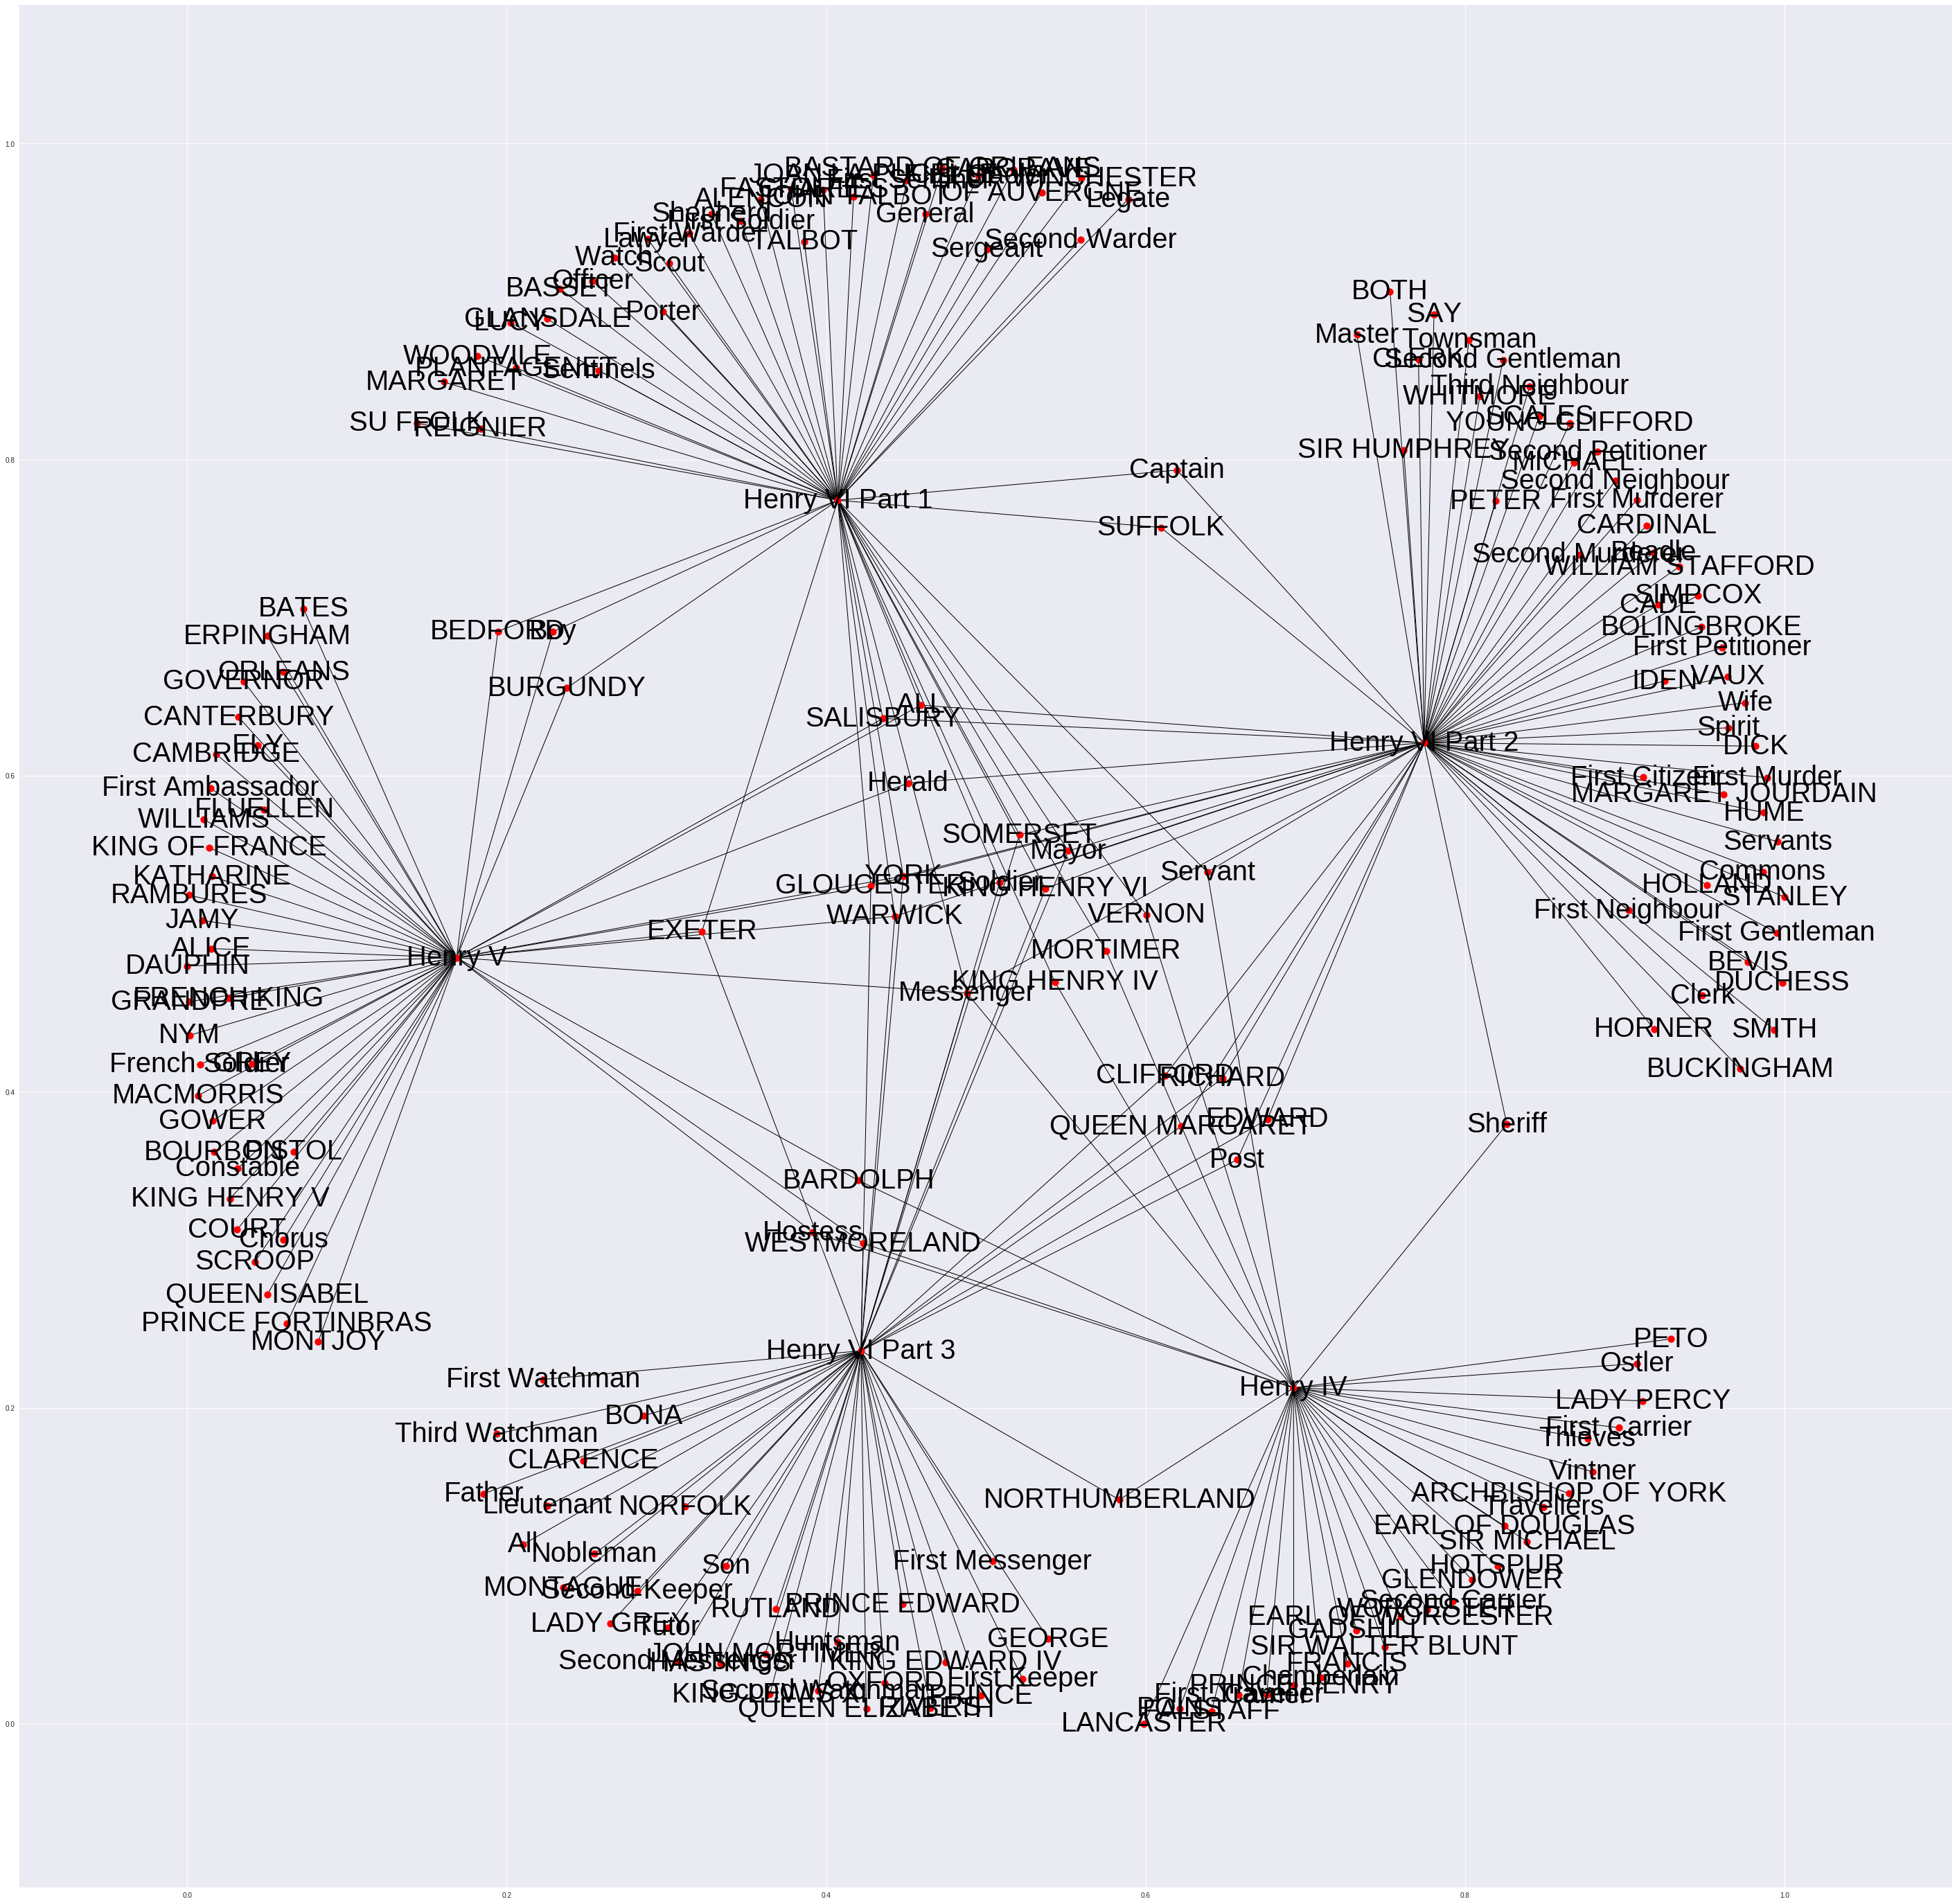

In [43]:
plt.show()